In [38]:
import csv
import numpy as np 
path ='/home/nrw/Documents/projects_Spring2018/Research/Experiments/15Mar2018/'
fname = 'data15Mar2018.csv'
file=open(path+fname, "r")
reader = csv.reader(file)
print(reader)
zero_pos = np.array([])
# calculate change in position = (final pos) - (zero pos)
outfname = 'delta_pos.csv'
outfile = open(path+outfname,"w")

for row_index, row in enumerate(reader):
    if row_index == 0:
        pass
    elif row_index % 2 == 1:
        zero_pos = np.array([float(j) for j in row[:4]])
    elif row_index % 2 == 0:
        pos = np.array([float(j) for j in row[:4]]) - zero_pos
        astr = ','.join(['%.2f' % num for num in pos])  + "\n"
        outfile.write(astr)
        
file.close()
outfile.close()
        
#for line in reader:
#    t=line[0]
#    print(t)

# https://rosettacode.org/wiki/Read_a_specific_line_from_a_file#Python

In [39]:
foo = [4,3,7,3]
foo[0:3]
foo[:2]

[4, 3]

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path ='/home/nrw/Documents/projects_Spring2018/Research/Experiments/15Mar2018/'
csv_file = 'data_position_IMU_camera.csv'

# pandas so I don't have to loop through file just to ge tone column
# https://stackoverflow.com/questions/16503560/read-specific-columns-from-a-csv-file-with-csv-module
df = pd.read_csv(csv_file)
eulerY = df["EulerY (delta degrees)"]
trueDeg = df["camera: degrees"]
trueF = df["Force (in grams)"]



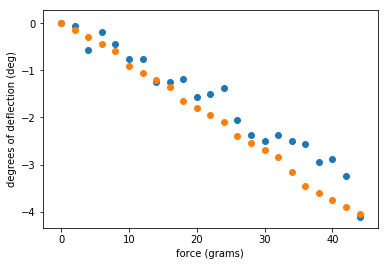

In [52]:
plt.scatter(trueF, eulerY)
plt.scatter(trueF, -trueDeg)
plt.ylabel('degrees of deflection (deg)')
plt.xlabel('force (grams)')
plt.show()

In [155]:
import numpy as np
import plotly.plotly as py
import plotly.offline as po
import plotly.graph_objs as go
from sklearn import linear_model
from sklearn.linear_model import Ridge

plotly.offline.init_notebook_mode(connected=True)

trace0 = go.Scatter(
    x = trueF,
    y = eulerY,
    mode = 'markers',
    name = 'degrees (by IMU)'
)
trace1 = go.Scatter(
    x = trueF,
    y = -trueDeg,
    mode = 'markers',
    name = 'true degrees (by webcam)'
)

myX = trueF.dropna().reshape(-1,1)
myy = eulerY.dropna()
ridge = Ridge(fit_intercept=True, alpha=0.0, random_state=0, normalize=True)
ridge.fit(myX, myy)
coef_ridge = ridge.coef_
gridx = np.linspace(X.min(), X.max(), 20)
coef_ = ridge.coef_ * gridx + ridge.intercept_
#plt.plot(gridx, coef_, 'g-', label="ridge regression")

trace2 = go.Scatter(
    x= gridx,
    y = coef_,
    name = 'linear fit (w/ridge penalty)'
)



#a,b = np.polyfit(x,y,1)
#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

           
data = [trace0, trace1, trace2]

layout = go.Layout(
    title='Force vs Degrees of Deflection',
    yaxis=dict(title='degrees'),
    xaxis=dict(title='Force (in grams)'),
    legend=dict(x=.1, y=-.5)
)


fig = go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
po.iplot(fig)
#po.plot(fig, filename='temp_plot.html')


/home/nrw/Documents/projects_Spring2018/Research/venv/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [101]:
import plotly
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": Layout(title="hello world")
})

# https://plot.ly/python/getting-started/#initialization-for-offline-plotting
# https://plot.ly/pandas/line-charts/#basic-line-plot
# https://plot.ly/python/getting-started/#more-examples
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html